In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
# Download the data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url)
data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


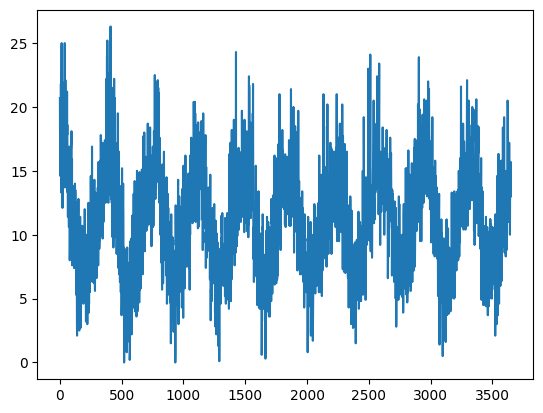

Date    0
Temp    0
dtype: int64


In [4]:
# Plot the time series data
plt.plot(data['Temp'])
plt.show()

# Check for missing values
print(data.isnull().sum())

In [7]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data['Temp'] = scaler.fit_transform(data['Temp'].values.reshape(-1, 1))

# Create the training and testing datasets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [ ]:
# Create the input and output sequences
look_back = 10
X_train, Y_train = [], []
for i in range(look_back, len(train_data)):
    X_train.append(train_data['Temp'][i-look_back:i])
    Y_train.append(train_data['Temp'][i])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# Define the LSTM model
model = keras.Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    LSTM(50),
    Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
73/73 [==============================] - 6s 25ms/step - loss: 0.0241 - val_loss: 0.0119
Epoch 2/100
73/73 [==============================] - 1s 12ms/step - loss: 0.0122 - val_loss: 0.0117
Epoch 3/100
73/73 [==============================] - 1s 12ms/step - loss: 0.0121 - val_loss: 0.0116
Epoch 4/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0123 - val_loss: 0.0117
Epoch 5/100
73/73 [==============================] - 1s 12ms/step - loss: 0.0119 - val_loss: 0.0121
Epoch 6/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 7/100
73/73 [==============================] - 1s 16ms/step - loss: 0.0118 - val_loss: 0.0111
Epoch 8/100
73/73 [==============================] - 1s 19ms/step - loss: 0.0116 - val_loss: 0.0119
Epoch 9/100
73/73 [==============================] - 1s 20ms/step - loss: 0.0115 - val_loss: 0.0108
Epoch 10/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0116 - val_loss: 0.0108

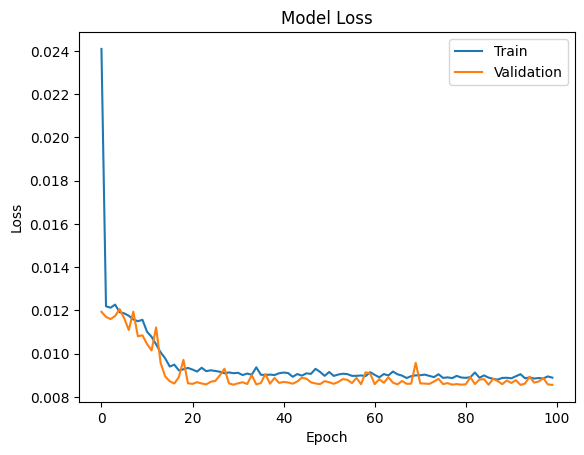

In [9]:
# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [11]:
# Make predictions on the test data
test_data = test_data['Temp'].values
X_test = []
for i in range(look_back, len(test_data)):
    X_test.append(test_data[i-look_back:i])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predictions = model.predict(X_test)

23/23 [==============================] - 2s 10ms/step


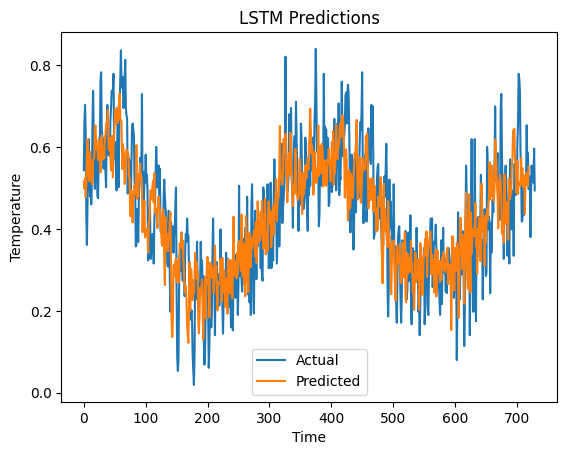

In [12]:
# Invert the scaling to get the original values
predictions = scaler.inverse_transform(predictions)
test_data = scaler.inverse_transform(test_data.reshape(-1, 1))

# Plot the predictions against the actual values
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Predictions')
plt.ylabel('Temperature')
plt.xlabel('Time')
plt.legend()
plt.show()